21BDS0029 SANGARAJU SAI SATHVIK VARMA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from scipy.stats import skew, kurtosis


In [2]:
# Load the dataset

file_path = "C:/Users/sanga/Downloads/vgchartz-2024.csv"  
df = pd.read_csv(file_path)

print("Dataset Dimensions:", df.shape)
print("Dataset Columns:", df.columns)
print("\nFirst Few Rows:\n", df.head())
print("\nData Summary:\n", df.describe())
print("\nData Info:\n")
df.info()

Dataset Dimensions: (64016, 14)
Dataset Columns: Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

First Few Rows:
                                              img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7

In [3]:
# Handling missing data

print("\nMissing Values Before Cleaning:\n", df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# Deduplication

duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Duplicates dropped.")

# Convert categorical columns using LabelEncoder

categorical_columns = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



Missing Values Before Cleaning:
 img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

Missing Values After Cleaning:
 img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64

Number of duplicate rows: 0


HISTOGRAMS


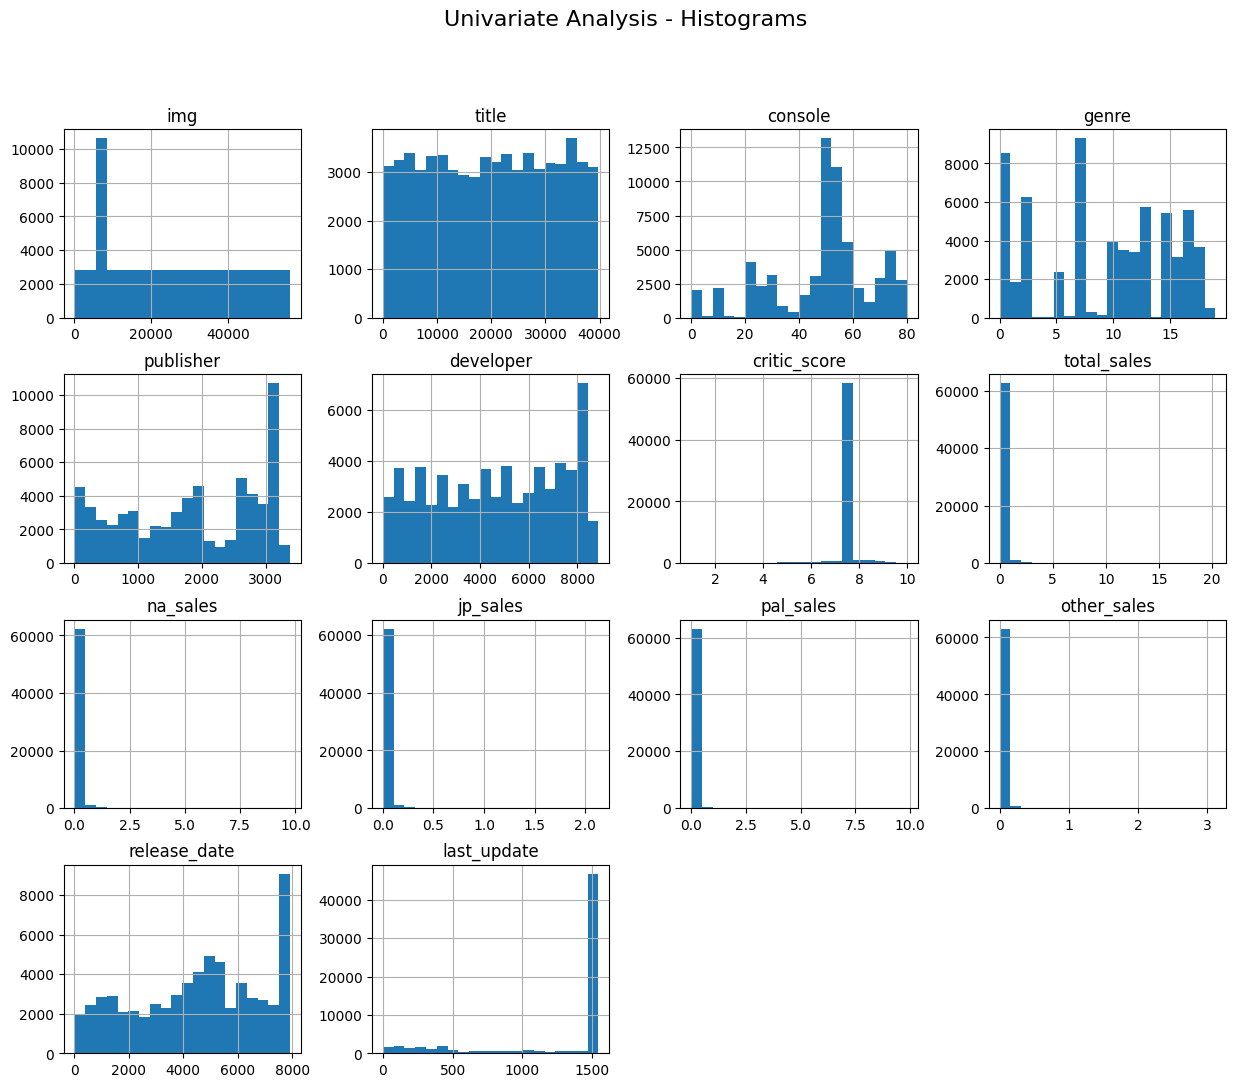

PAIRPLOTS


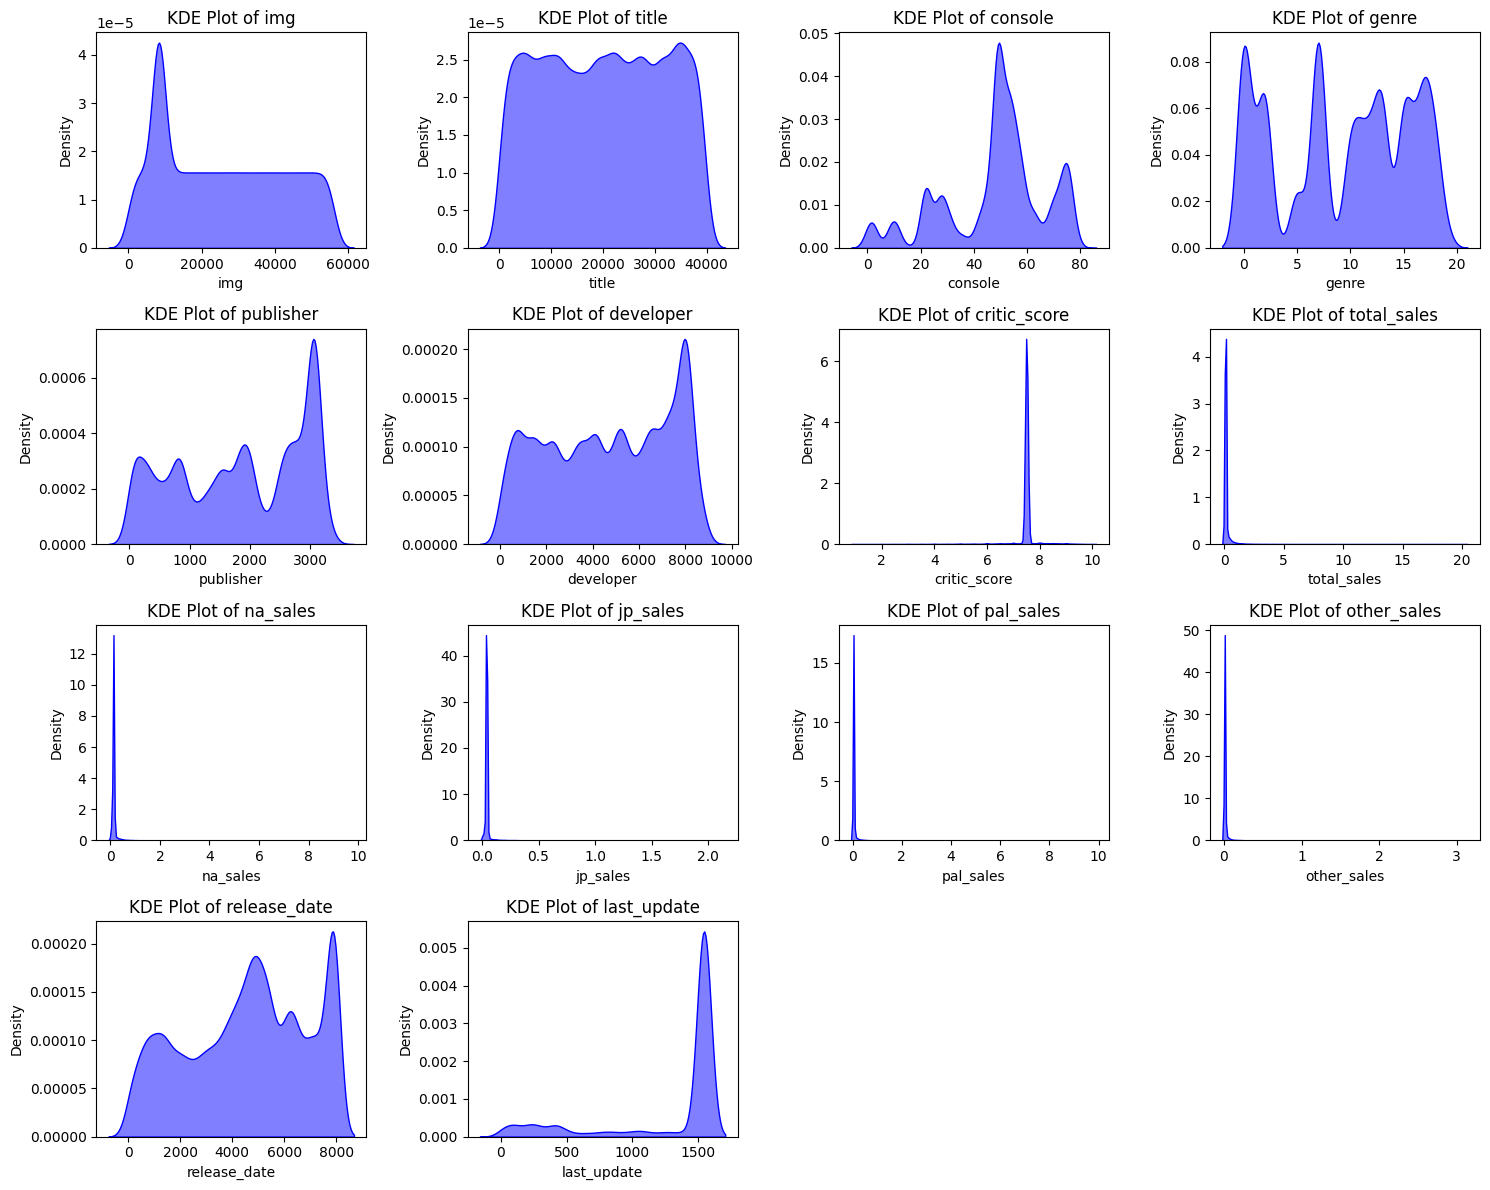

BOXPLOTS


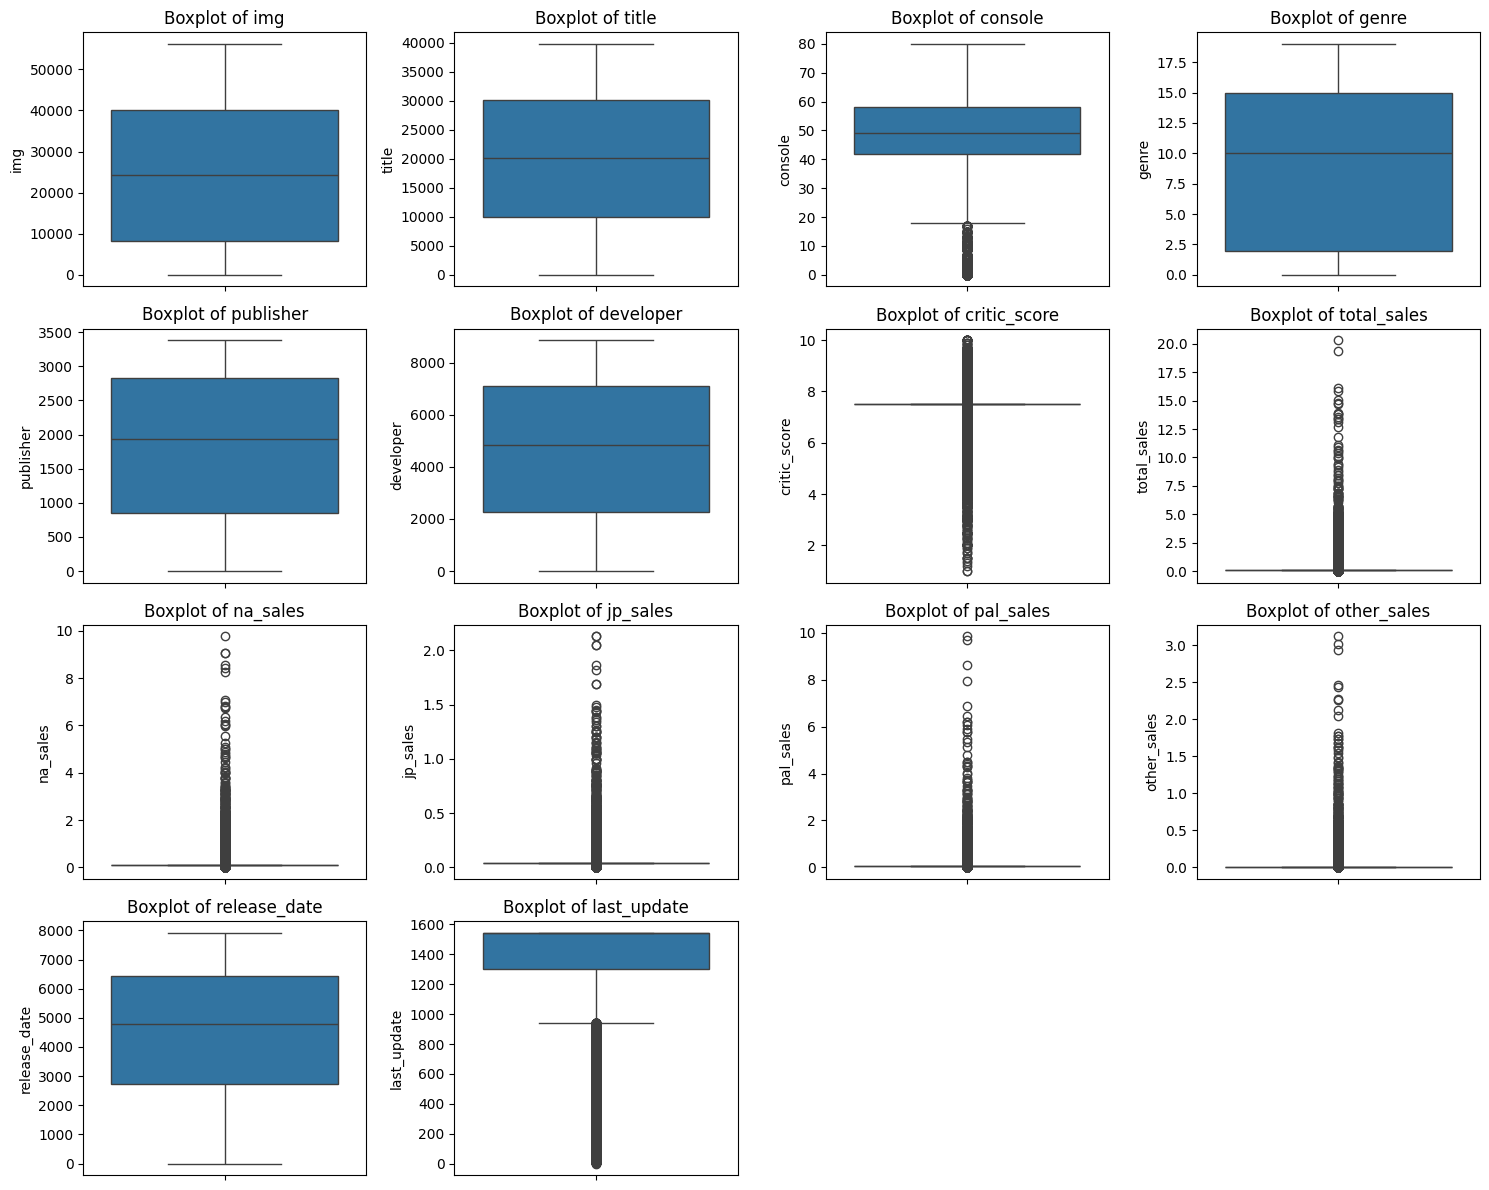


Skewness and Kurtosis:
img: Skewness = 0.23, Kurtosis = -1.27
title: Skewness = -0.01, Kurtosis = -1.22
console: Skewness = -0.66, Kurtosis = 0.01
genre: Skewness = -0.18, Kurtosis = -1.32
publisher: Skewness = -0.25, Kurtosis = -1.33
developer: Skewness = -0.15, Kurtosis = -1.29
critic_score: Skewness = -4.22, Kurtosis = 38.61
total_sales: Skewness = 15.88, Kurtosis = 408.37
na_sales: Skewness = 15.51, Kurtosis = 389.14
jp_sales: Skewness = 14.32, Kurtosis = 300.27
pal_sales: Skewness = 20.95, Kurtosis = 700.51
other_sales: Skewness = 19.82, Kurtosis = 591.52
release_date: Skewness = -0.23, Kurtosis = -1.04
last_update: Skewness = -1.54, Kurtosis = 0.71


In [4]:
#UNIVARIATE ANALYSIS
 
#Histograms
print("HISTOGRAMS")
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(figsize=(15, 12), bins=20)
plt.suptitle("Univariate Analysis - Histograms", fontsize=16)
plt.show()

# KDE Plots
print("PAIRPLOTS")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(data=df, x=col, fill=True, color='blue', alpha=0.5)
    plt.title(f"KDE Plot of {col}")
plt.tight_layout()
plt.show()

# Boxplots
print("BOXPLOTS")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in numeric_columns:
    print(f"{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")


BOXPLOTS


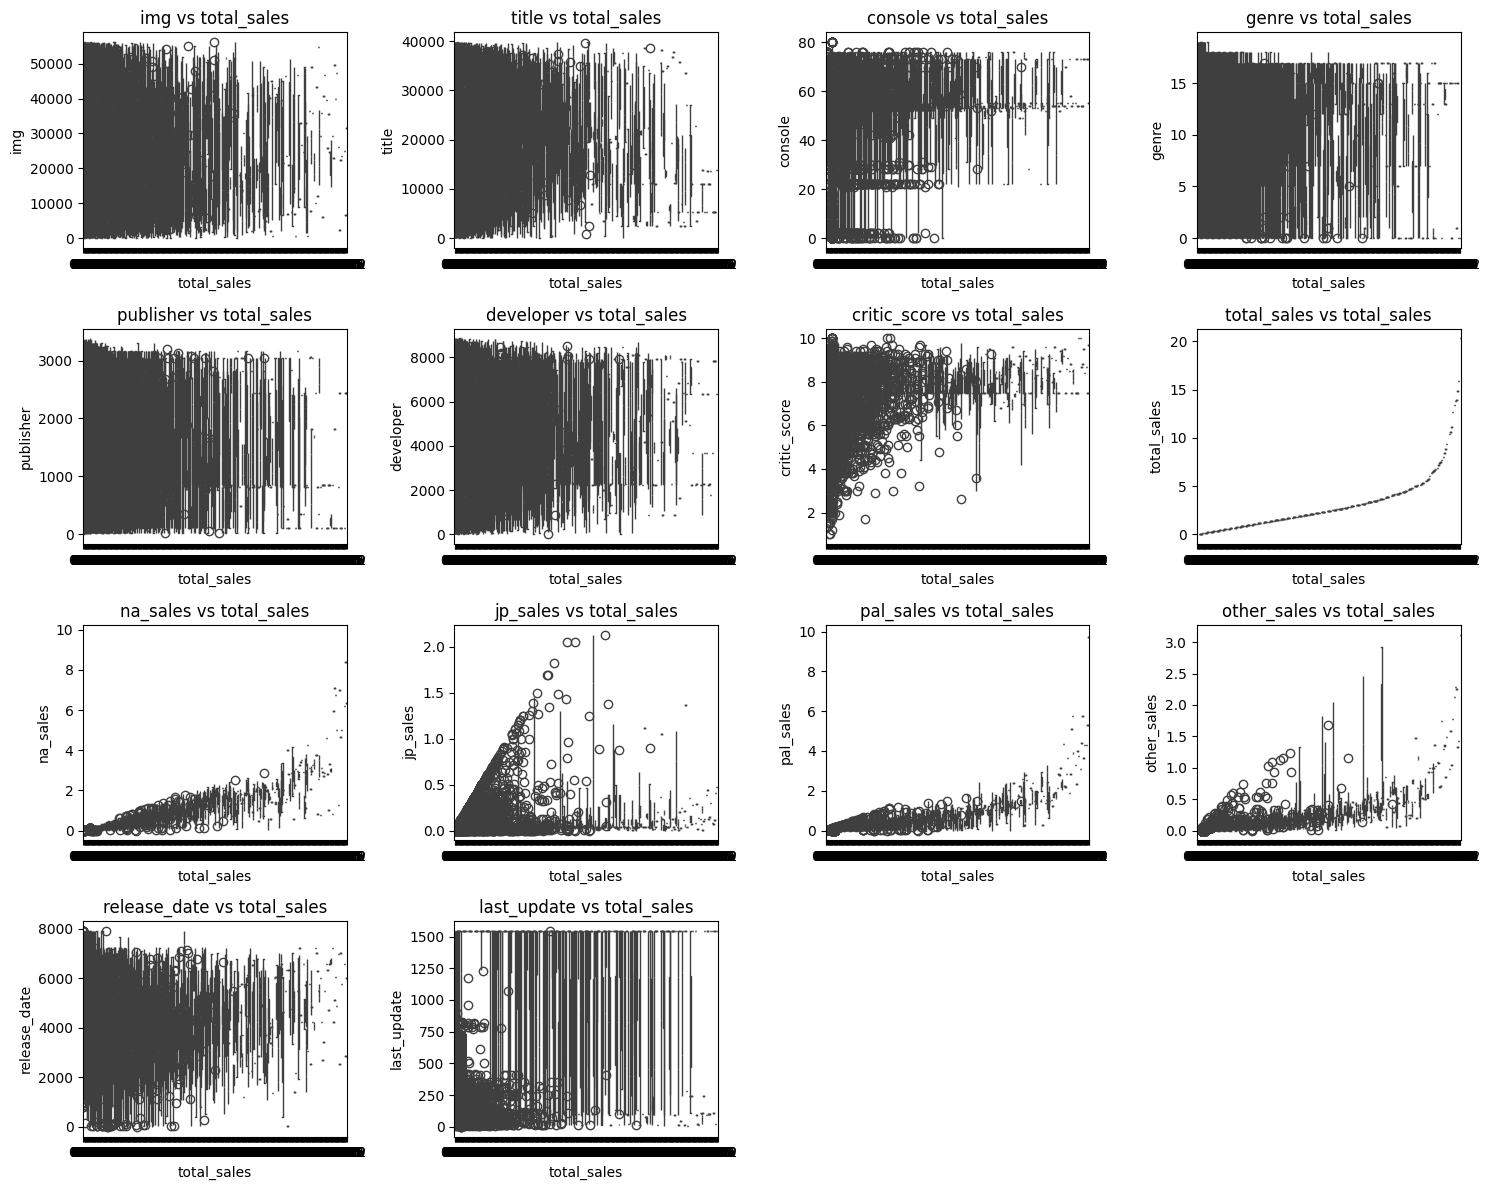

SCATTER PLOT


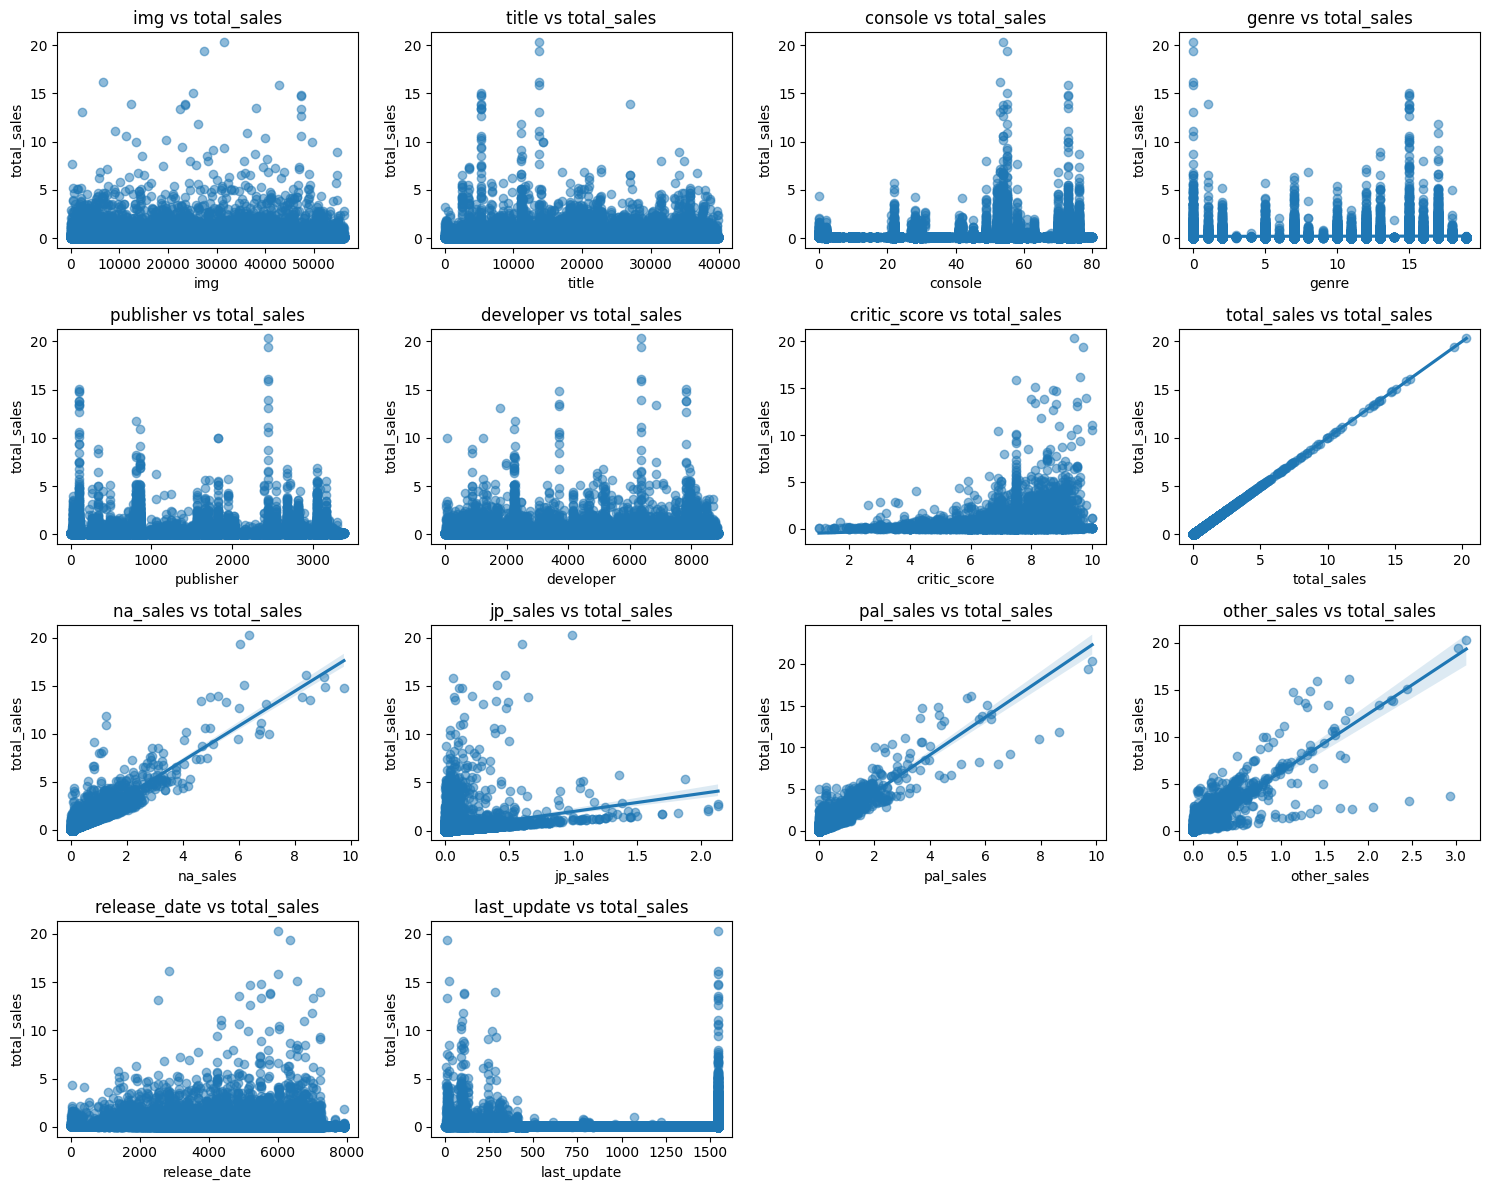

CATEGORICAL FEATURES


<Figure size 1500x1000 with 0 Axes>

In [5]:
#BIVARIATE ANALYSIS

target_column = 'total_sales'

# Boxplots
print("BOXPLOTS")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=target_column, y=col)
    plt.title(f"{col} vs {target_column}")
plt.tight_layout()
plt.show()

# Scatter Plots with Regression
print("SCATTER PLOT")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.regplot(data=df, x=col, y=target_column, scatter_kws={'alpha': 0.5})
    plt.title(f"{col} vs {target_column}")
plt.tight_layout()
plt.show()

# Categorical Feature Analysis
print("CATEGORICAL FEATURES")
categorical_columns = df.select_dtypes(include='object').columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue=target_column)
    plt.title(f"{col.capitalize()} vs {target_column}")
plt.tight_layout()
plt.show()



PAIRPLOT


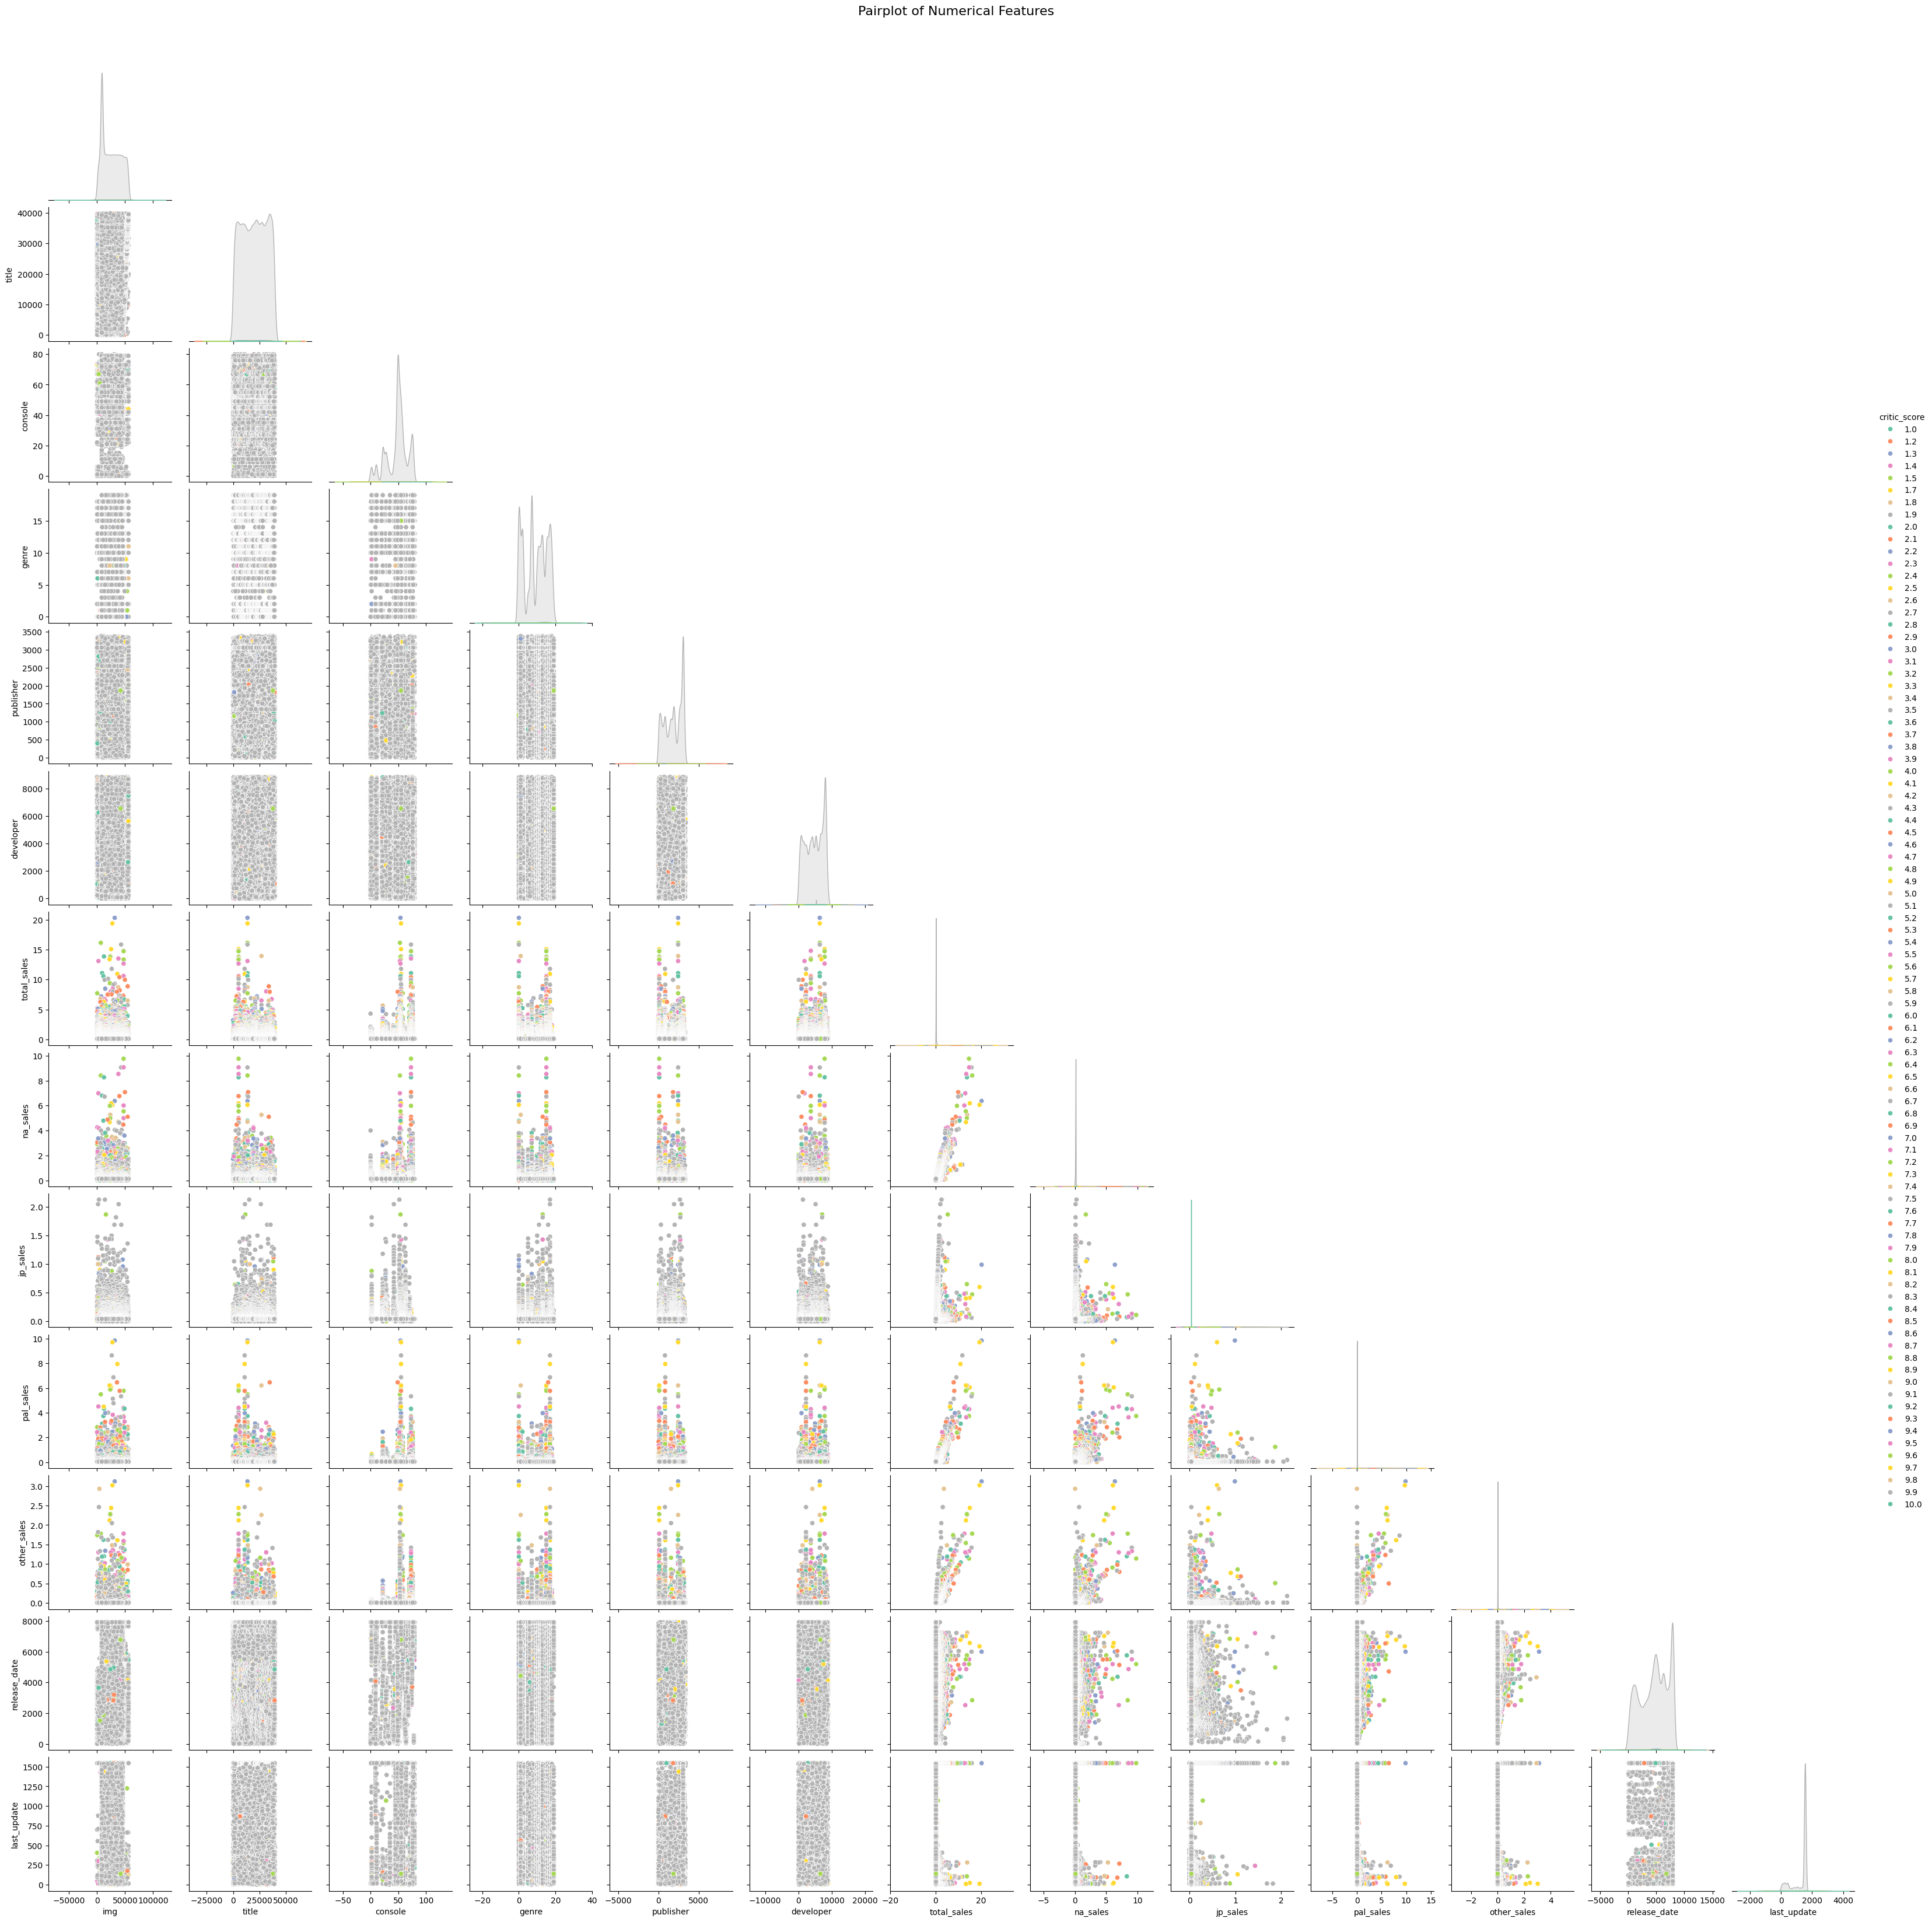

HEATMAP


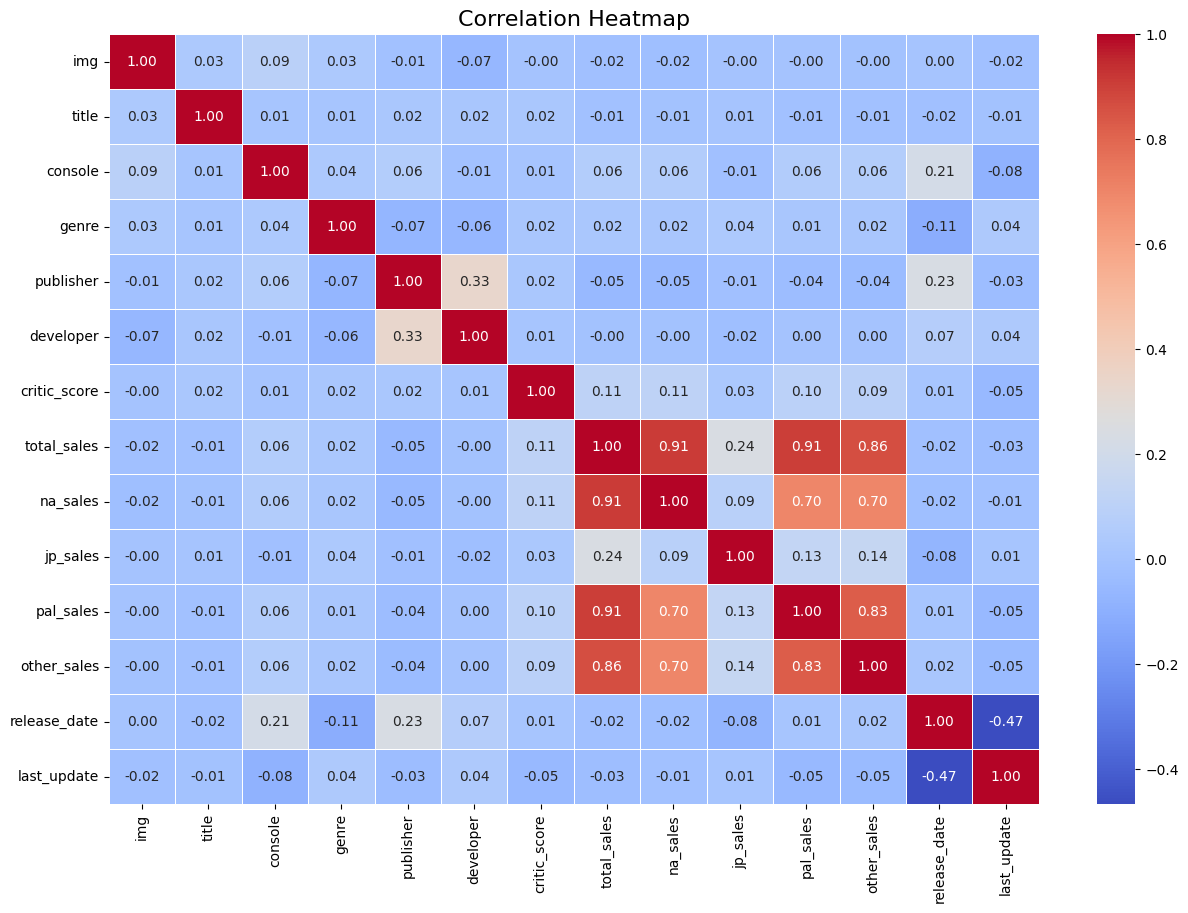

VIOLIN


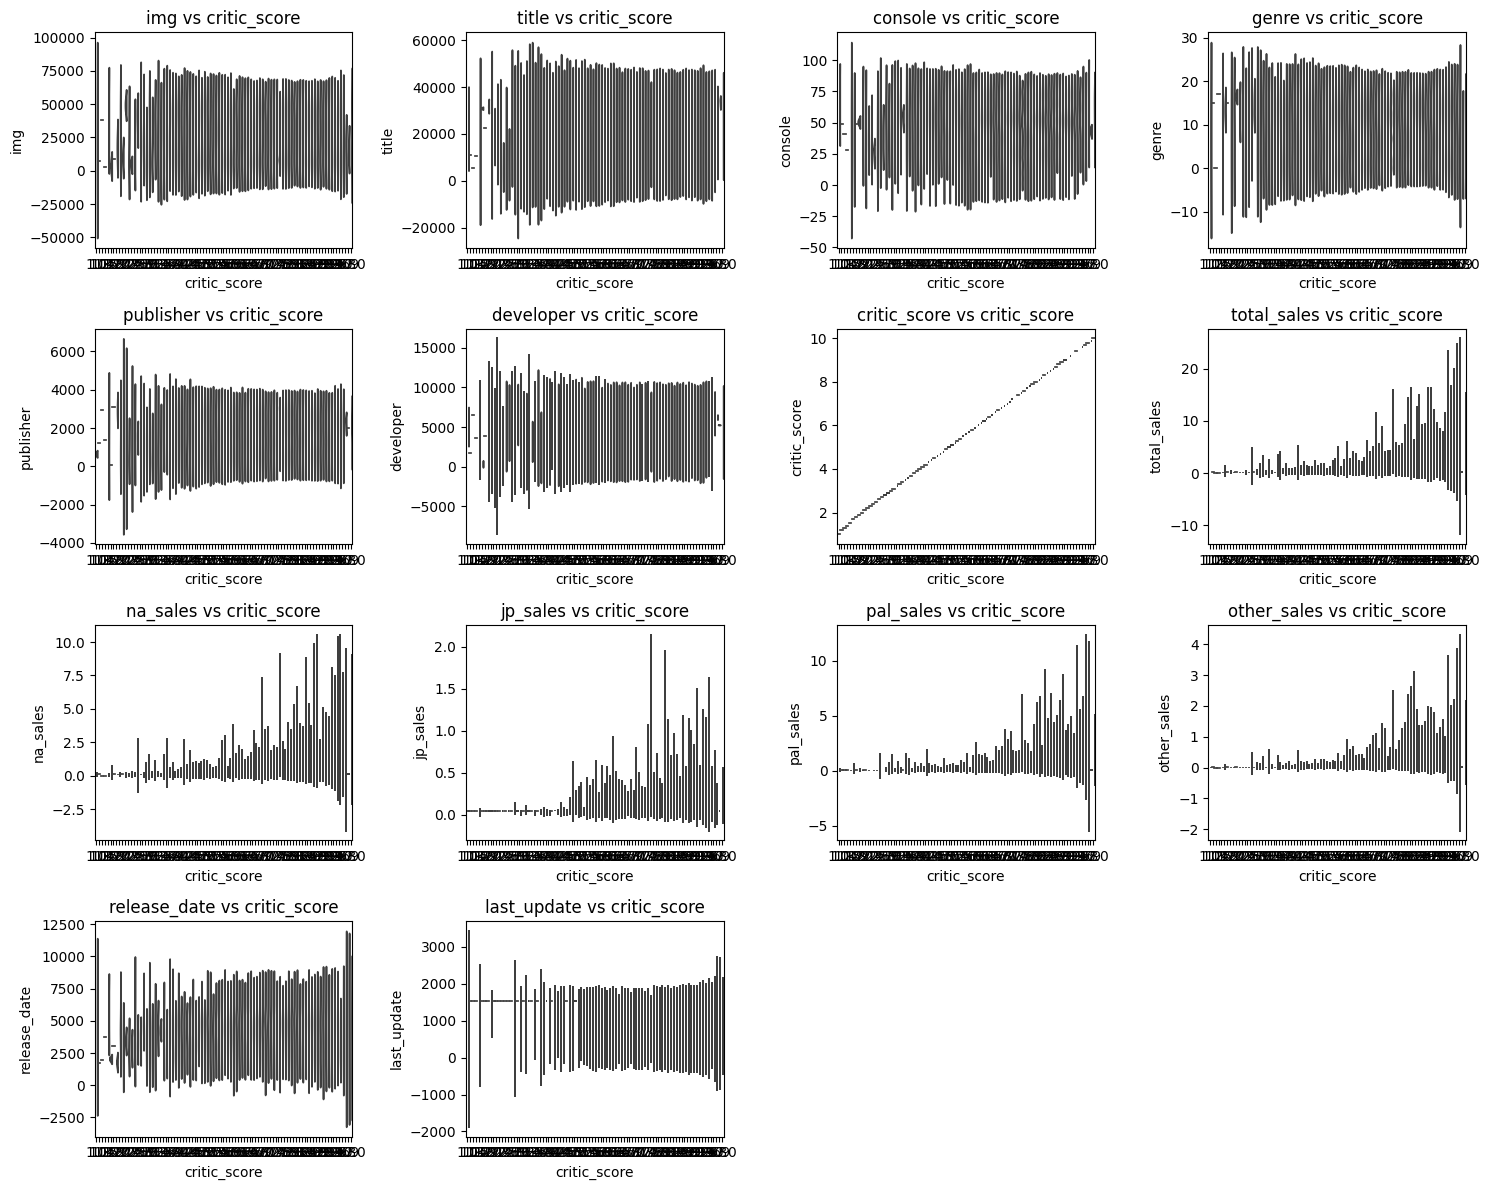

PCA


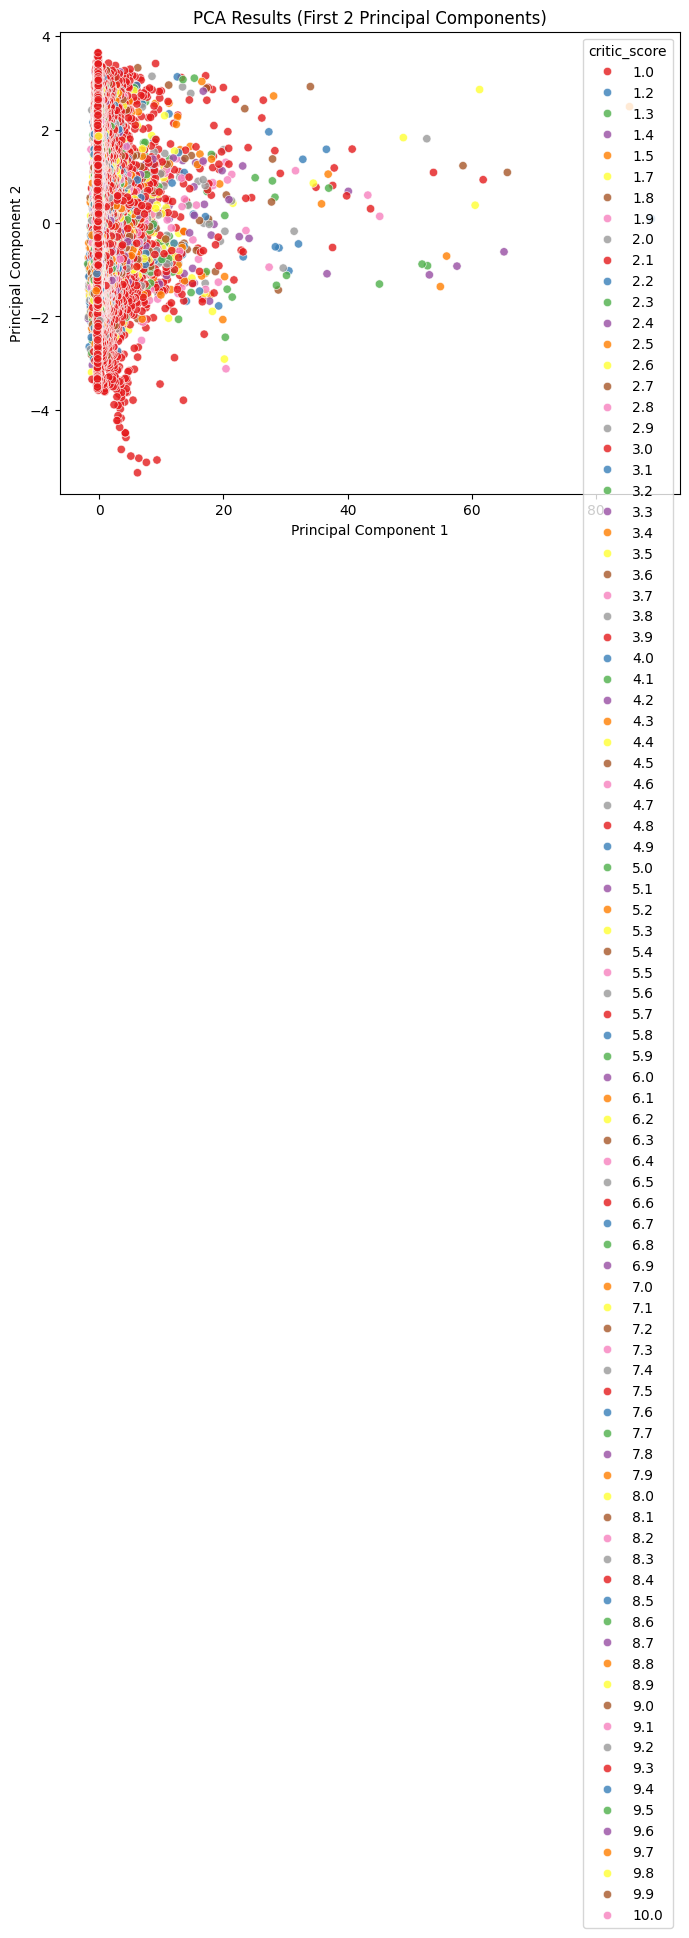

In [6]:
#MULTIVARIATE ANALYSIS

target_column = 'critic_score'

# Pairplot
print("PAIRPLOT")
sns.pairplot(df, diag_kind="kde", hue=target_column, corner=True, palette='Set2')
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

# Correlation Heatmap
print("HEATMAP")
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Violin Plots
print("VIOLIN")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(data=df, x=target_column, y=col, split=True, inner='quartile')
    plt.title(f"{col} vs {target_column}")
plt.tight_layout()
plt.show()

# PCA Visualization
print("PCA")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include='number'))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA_1'] = pca_result[:, 0]
df['PCA_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA_1', y='PCA_2', hue=target_column, palette='Set1', alpha=0.8)
plt.title("PCA Results (First 2 Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


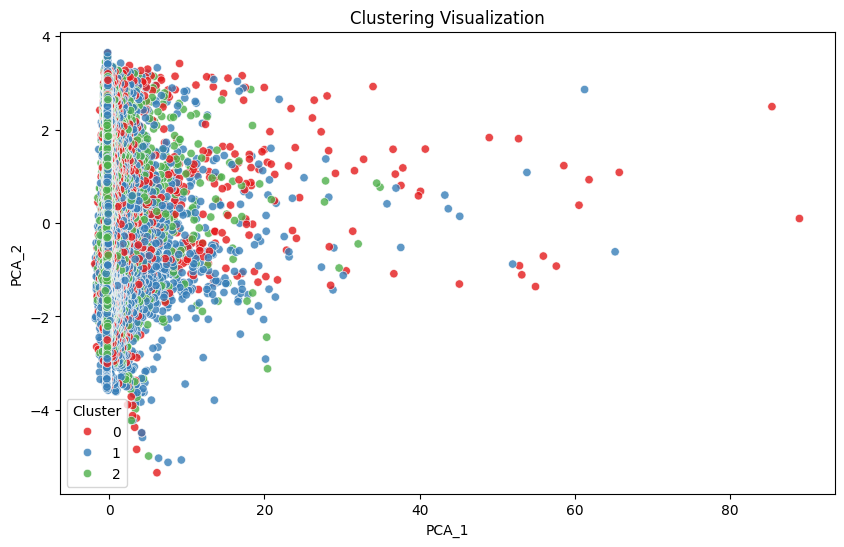

In [7]:
#CLUSTERING WITH KMEANS

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_columns])

# Visualizing Clusters with PCA Components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA_1', y='PCA_2', hue='Cluster', palette='Set1', alpha=0.8)
plt.title("Clustering Visualization")
plt.show()


Explained Variance Ratio by PCA Components: [0.25184743 0.12025801]


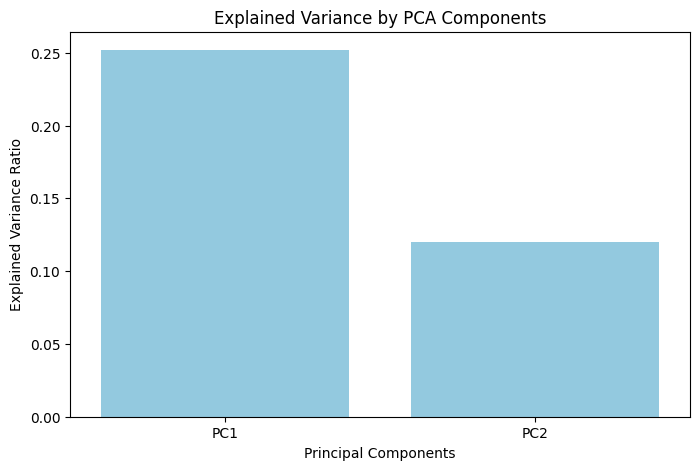

In [8]:
#PCA - DIMENSIONALITY REDUCTION

# PCA explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio by PCA Components:", explained_variance)

# Bar plot for explained variance
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_variance))], y=explained_variance, color='skyblue')
plt.title("Explained Variance by PCA Components")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.show()


In [9]:
#Data Preprocessing

# Split Data
X = df.drop(columns=target_column)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\sanga\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No predictions for classes: {1, 2}

Logistic Regression Model Evaluation:
Accuracy: 0.9990627928772259
Precision: 0.9982824579612865
Recall: 0.9990627928772259
F1 Score: 0.9986724729862753
ROC AUC Score: 0.8681939315070226
Confusion Matrix:
 [[12792     1     0]
 [    8     0     0]
 [    3     0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12793
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         3

    accuracy                           1.00     12804
   macro avg       0.33      0.33      0.33     12804
weighted avg       1.00      1.00      1.00     12804


Random Forest Model Evaluation:
Accuracy: 0.9996094970321775
Precision: 0.9994012531986451
Recall: 0.9996094970321775
F1 Score: 0.9995038376277076
ROC AUC Score: 0.9539378841847188
Confusion Matrix:
 [[12793     0     0]
 [    2     6     0]
 [    0     3     0]]
Classification Report:
 

C:\Users\sanga\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanga\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sanga\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

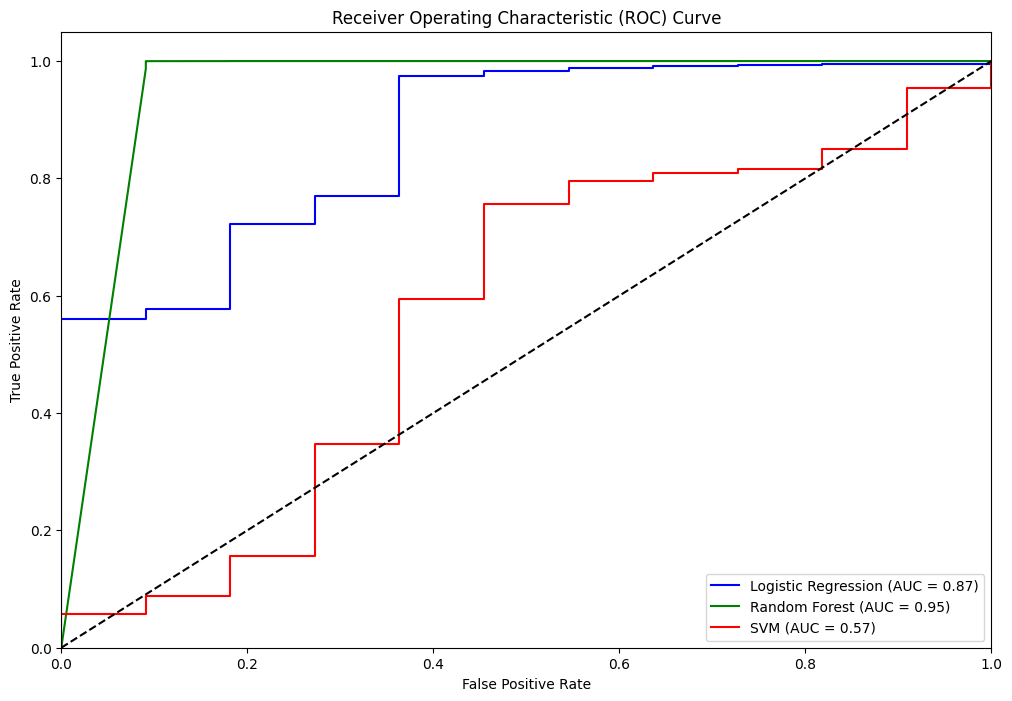

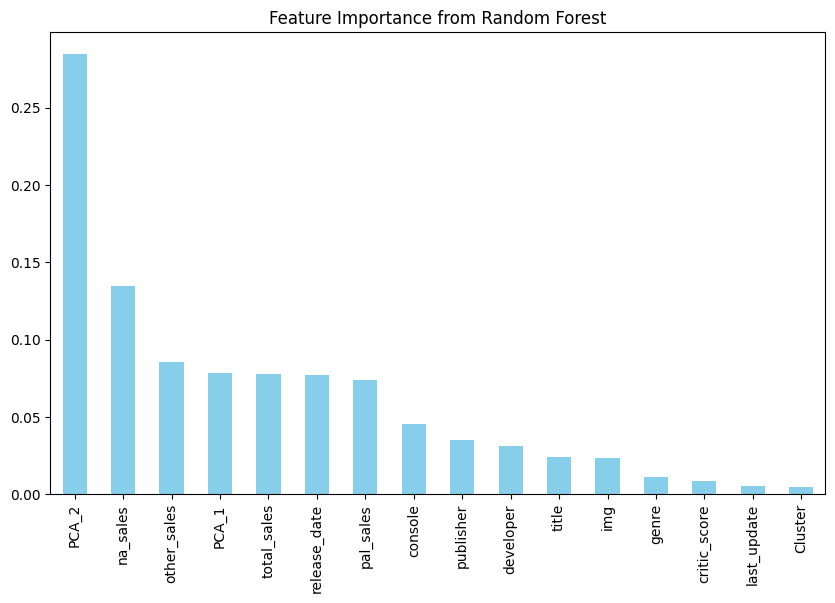

In [15]:
#MODEL DEVELOPMENT AND EVALUATION

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df, and we want to use 'jp_sales' as the target column
target_column = 'jp_sales'

# Convert continuous target to categorical (bins of 3 categories, adjust as needed)
y = pd.cut(df[target_column], bins=3, labels=[0, 1, 2])  # Adjust bins and labels

# Features
X = df.drop(columns=[target_column])  # Drop the target column for features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)

# Support Vector Machine (SVM)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm_proba = svm.predict_proba(X_test)

# Store predictions in a dictionary
predictions = {
    'Logistic Regression': (y_pred_logreg, y_pred_logreg_proba),
    'Random Forest': (y_pred_rf, y_pred_rf_proba),
    'SVM': (y_pred_svm, y_pred_svm_proba)
}

# Binarize the true labels for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Evaluation Function
def evaluate_model(y_test, y_pred, y_pred_proba, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))  # Adjusted for zero_division
    print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))  # Adjusted for zero_division
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))  # Adjusted for zero_division
    print("ROC AUC Score:", roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted'))  # Adjusted for multi-class
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.utils.multiclass import unique_labels
missing_classes = set(unique_labels(y_test)) - set(y_pred)
if missing_classes:
    print(f"No predictions for classes: {missing_classes}")

# Evaluate all models
for model_name, (y_pred, y_pred_proba) in predictions.items():
    evaluate_model(y_test, y_pred, y_pred_proba, model_name)

# Plot ROC Curves for Multi-Class Classification
plt.figure(figsize=(12, 8))

# Logistic Regression ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_bin[:, 0], y_pred_logreg_proba[:, 0])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', color='blue')

# Random Forest ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, 0], y_pred_rf_proba[:, 0])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')

# SVM ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin[:, 0], y_pred_svm_proba[:, 0])
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='red')

# Random guess line (diagonal line)
plt.plot([0, 1], [0, 1], 'k--')

# Plotting details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))

# Feature importance from the Random Forest model
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.show()


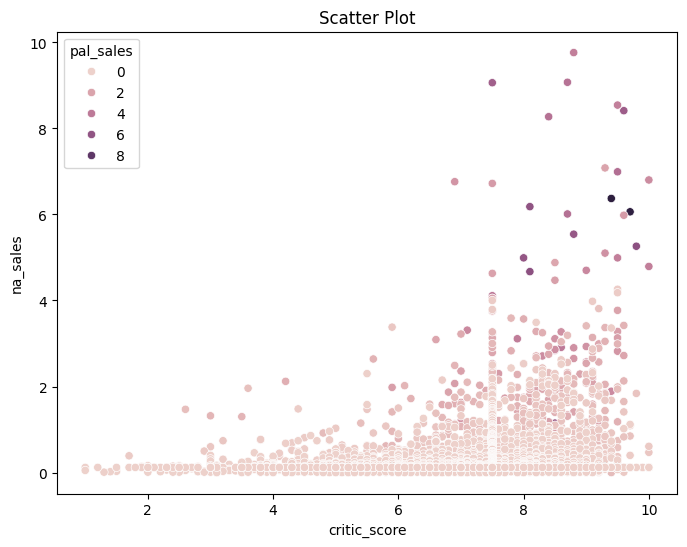

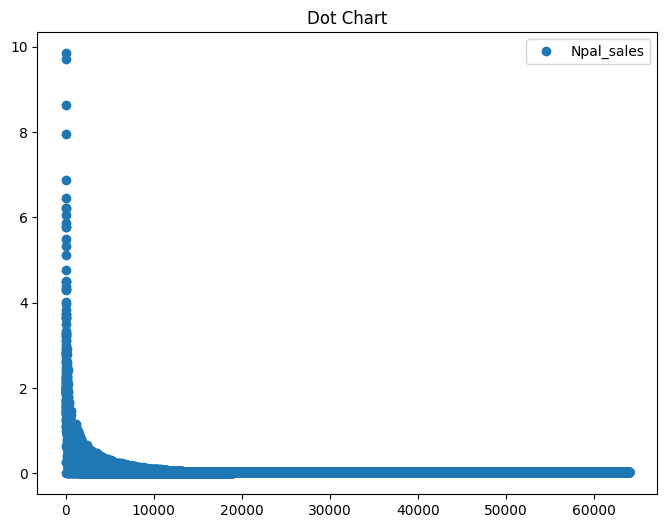

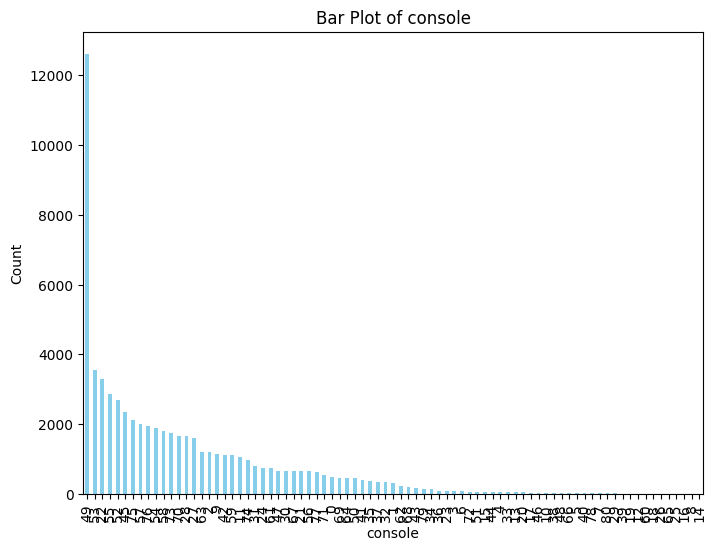

In [18]:
#ADDTIONAL VISUALIZATIONS

# Scatter plots
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='critic_score', y='na_sales', hue='pal_sales')
plt.title("Scatter Plot")
plt.show()

# Dot charts
plt.figure(figsize=(8, 6))
plt.plot(df['pal_sales'], 'o', label='Npal_sales')
plt.title("Dot Chart")
plt.legend()
plt.show()

# Bar plots
plt.figure(figsize=(8, 6))
df['console'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Bar Plot of console")
plt.xlabel("console")
plt.ylabel("Count")
plt.show()
